<a href="https://colab.research.google.com/github/AyusheeMittal/legendary-guide/blob/master/8th_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


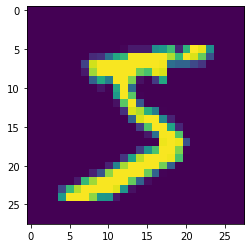

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(12, 3, 3, activation='relu' , use_bias=False,
                        activity_regularizer=keras.regularizers.l2(0.000000001),
                        input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(20, 3, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(12, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(20, 3, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.25))
model.add(Convolution2D(10, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(10,3))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", use_bias=False, activity_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 12)        108       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 12)        48        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1744      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 20)        2900      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 20)        80        
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 20)       

In [12]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return (round(0.0035 * 1/(1 + 0.33 * epoch), 10))
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(0.0035),
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test), callbacks= [LearningRateScheduler(scheduler, verbose =1)] )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.0035.
60000/60000 [==============================] - 38s 632us/step - loss: 0.1666 - acc: 0.9486 - val_loss: 0.0565 - val_acc: 0.9824
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0026315789.
60000/60000 [==============================] - 37s 616us/step - loss: 0.0617 - acc: 0.9811 - val_loss: 0.0536 - val_acc: 0.9830
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0021084337.
60000/60000 [==============================] - 37s 612us/step - loss: 0.0476 - acc: 0.9853 - val_loss: 0.0464 - val_acc: 0.9844
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.001758794.
60000/60000 [==============================] - 37s 614us/step - loss: 0.0414 - acc: 0.9871 - val_loss: 0.0417 - val_acc: 0.9869
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0015086207.
60000/60000 [

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.018910792756626323, 0.9941]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[4.22777768e-09 8.52803112e-07 1.60338473e-07 9.75489201e-08
  9.75362241e-07 1.32468926e-07 2.11718820e-09 9.99992490e-01
  2.72886203e-09 5.36939069e-06]
 [1.00795774e-06 4.43244971e-07 9.99998569e-01 2.48729881e-09
  3.41102324e-09 7.89464161e-10 4.90922503e-08 3.41457751e-09
  2.49247556e-09 6.71880121e-11]
 [1.70585612e-11 9.99999762e-01 3.47964907e-10 2.18840918e-10
  1.97158592e-08 1.10071149e-07 3.94986355e-09 1.08503848e-07
  1.81719778e-11 4.53311833e-10]
 [9.99997258e-01 1.26616453e-10 3.79499632e-09 2.83251955e-09
  3.58326369e-09 1.51496273e-08 2.67570476e-06 4.37329017e-09
  3.51982834e-08 9.76223014e-09]
 [4.06488298e-12 6.52973586e-09 1.67212789e-11 1.24816227e-10
  9.99997735e-01 1.10185305e-09 1.22236079e-08 1.30450140e-08
  9.82441350e-10 2.28904969e-06]
 [8.17159014e-12 9.99999762e-01 7.70831107e-11 2.21805820e-12
  2.71043170e-08 5.34072075e-09 2.22220309e-09 1.88956179e-07
  4.72910036e-12 2.11547904e-10]
 [3.30284439e-10 5.28749013e-07 6.26328822e-10 1.36759605e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

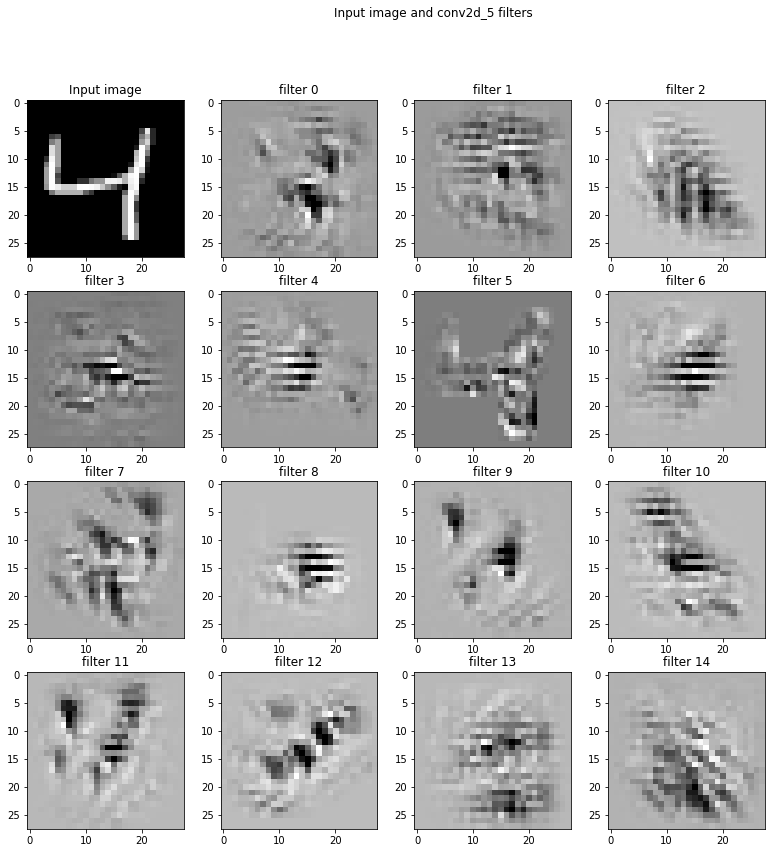

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_5'):
    
    layer_output = layer_dict[layer_name].output
    
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])
        
        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]
        
        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
        
        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])
        
        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
      
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 64:
        plot_x, plot_y = 8, 8
    elif layer_output.shape[3] >= 32:
        plot_x, plot_y = 4, 8
    elif layer_output.shape[3] >= 16:
        plot_x, plot_y = 4, 4
    else:
        plot_x, plot_y = 2, 2
    
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()